#Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#Task 1: Linear Regression with Non-Linear Basis Functions

##1.1: Generate data from non-linear function

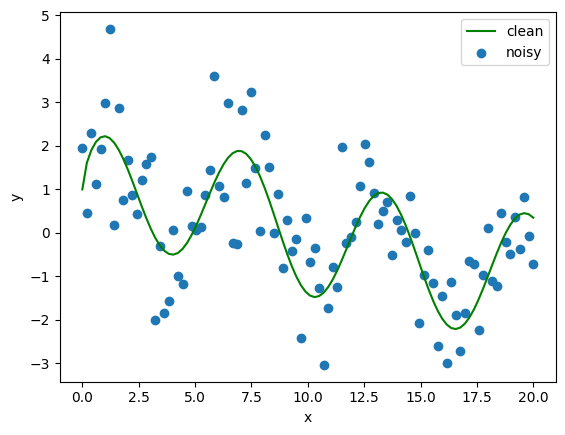

In [ ]:
# define the non-linear function
def f(x):
  return np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x)

# generate the data points (100 of them)
x = np.linspace(0, 20, 100)
e = np.random.normal(0, 1, 100)
y_noisy = f(x) + e
y_clean = f(x)

# plot the data points
plt.plot(x, y_clean, label='clean', color='green')
plt.scatter(x, y_noisy, label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

##1.2: Non-Linear Basis Functions

Here we are first reshaping the samples x, to the form of 100 rows of samples with 1 feature each. Next, we calculate the gaussian bases for each sample and from the 1 feature of each sample we create 100 features. So the new design matrix has 100 samples and 100 features.

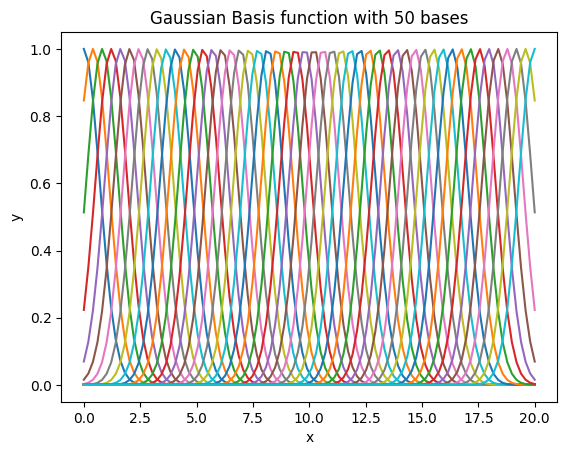

In [ ]:
# define the gaussian basis function
def gaussian(x, mu, sigma):
  return np.exp(-(x-mu)**2/(sigma**2))


# func to calc phi with D features
def calc_phi(x, D, plot=False):
  # define sigma
  sigma = 1

  # calc the means (100 means distributed from 0 to 20)
  mu = np.linspace(0,20,D)

  # get phi
  phi = gaussian(x[:,None], mu[None,:], sigma)

  if plot:
    # plot gaussian basis for 100 bases
    for d in range(D):
      plt.plot(x, phi[:,d])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gaussian Basis function with ' + str(D) + ' bases')
    plt.show()

  return phi

# plot the gaussian basis
phi = calc_phi(x, 50, plot=True)


##1.3: Model Fitting (fit model with different number of bases)

Implement Linear Regression Model







In [ ]:
# implement linear regression model
class LinearRegression():
  def __init__(self, w=None, a=1):
    self.w = w
    self.a = a

  # func to train model
  def fit(self, x, y):
    # add the bias feature
    x = np.column_stack((np.ones(x.shape[0]), x))
    # calculate the weights
    self.w = ((np.linalg.inv(x.T@x))@x.T)@y
    return self

  # func to predict
  def predict(self, x):
    # add the bias feature
    x = np.column_stack((np.ones(x.shape[0]), x))
    # calculate the predictions
    yh = x@self.w
    return yh


Fit the model using gaussian basis function (10 different number of bases)

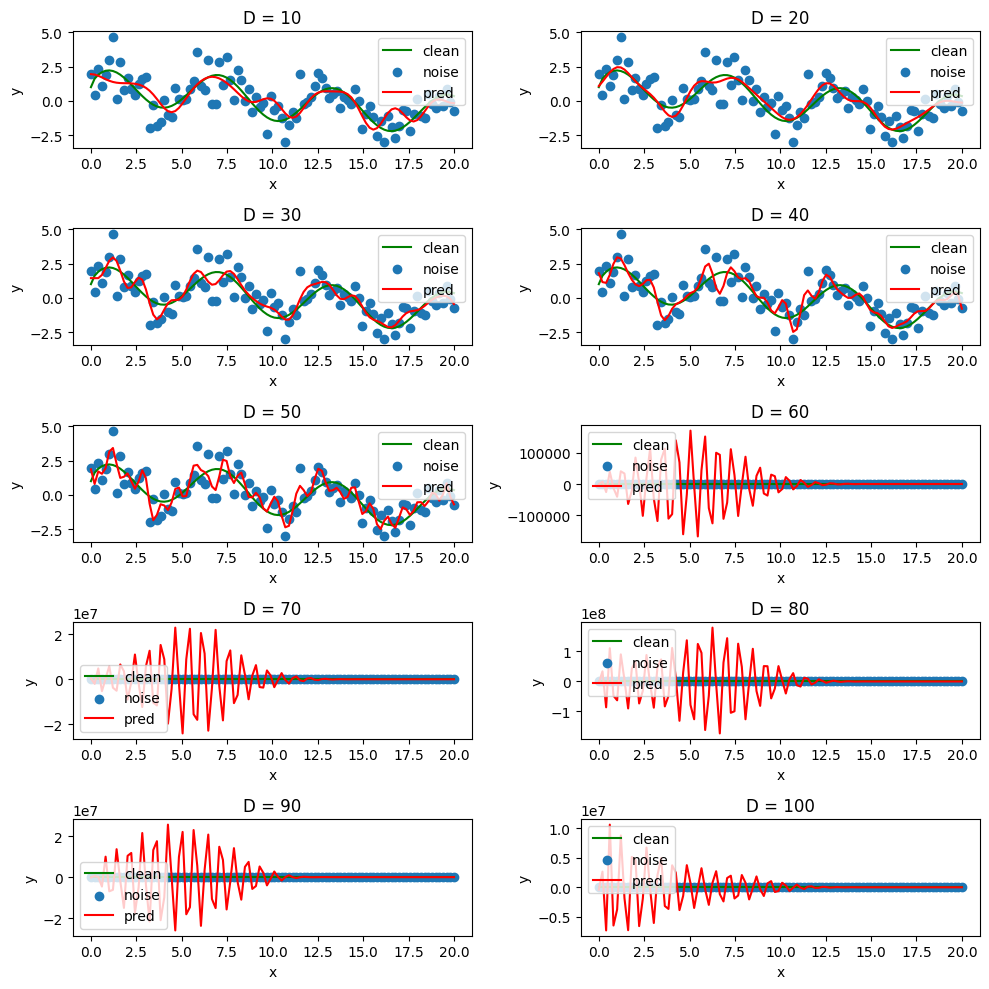

In [ ]:
# for each i train model with i bases and plot the predictions
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
  D = (i+1) * 10
  # calc phi
  phi = calc_phi(x, D)
  model = LinearRegression()
  # train model
  model.fit(phi, y_noisy)
  # make predictions
  yh = model.predict(phi)

  # plot predictions
  ax.plot(x, y_clean, label='clean', color='green')
  ax.scatter(x, y_noisy, label='noise')
  ax.plot(x, yh, label='pred', color='red')
  ax.set_title(f'D = {D}')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend()



plt.tight_layout()
# display figure
plt.show()

##1.4: Model Selection (split data, and get the model that minimizes the error)

validation set: SSE:  42.6034009981009 number of bases:  10
train set: SSE:  23.615521609186104 number of bases:  50


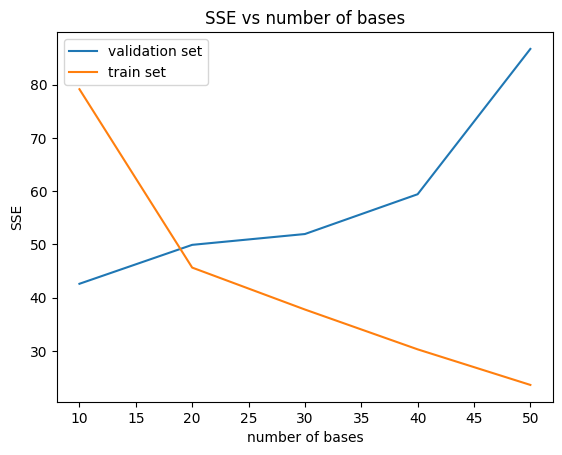


without gaussian bases:
validation set: SSE:  56.82953895759744
train set: SSE:  116.85554177808552


In [ ]:
# split data into train and validation set using a 80 / 20 split
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.2, random_state=39)

# for each model compute the error
model = LinearRegression()
ssev = []
sset = []
for i in range(0, 10):
    D = (i+1) * 10
    phi = calc_phi(x_train, D)
    # train model on train set
    model.fit(phi, y_train)
    # make prediction on validation set
    yh = model.predict(calc_phi(x_val, D))
    # append error to list
    ssev.append(np.sum((y_val - yh)**2))

    # make prediction on train set
    yh = model.predict(calc_phi(x_train, D))
    # append error to list
    sset.append(np.sum((y_train - yh)**2))

# print the min error
print("validation set:", "SSE: ", np.min(ssev), "number of bases: ", (np.argmin(ssev)+1)*10)
print("train set:", "SSE: ", np.min(sset), "number of bases: ", (np.argmin(sset)+1)*10)

# make a plot to visualize the optimal number of bases (where the validation error is minimized)
plt.plot(np.arange(10, 60, 10), ssev[:5], label='validation set')
plt.plot(np.arange(10, 60, 10), sset[:5], label='train set')
plt.title('SSE vs number of bases')
plt.xlabel('number of bases')
plt.ylabel('SSE')
plt.legend()
plt.show()


# compare this to a model trained without the gausian bases
model.fit(x_train, y_train)
yh_val = model.predict(x_val)
yh_train = model.predict(x_train)

print()
print("without gaussian bases:")
print("validation set:", "SSE: ", np.sum((y_val - yh_val)**2))
print("train set:", "SSE: ", np.sum((y_train - yh_train)**2))


The optimal number of bases is 20, this is the number that minimizes the error on the validation set and is a desent comprimize of bias (error on the train set).

##1.5: Explanation

When the model is very simple (low number of bases), it cannot fit to the data well at all, which leads to high train error and high test error. As the number of bases increase, the model fits the training data better and better. This means that for a high number of bases, the model is overfitted and preforms very poorly on the validation set (high validation error). However, since the gaussian bases use a fixed size standard deviation, for number of bases over 50, the width of the curves are wide and the model can no longer fit the data.

The validation set helps us pick the optimal model, because we can see where the validation error is the smallest, and compare it to the train error, to make sure the model is not overfitting or underfitting.

The plot below shows how the train error starts to increase again after 50 bases due to the curves being too wide and cannot fit the train data anymore.

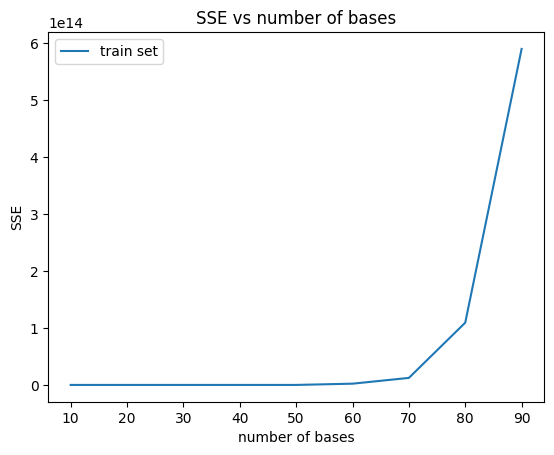

In [ ]:
# split data into train and validation set using a 80 / 20 split
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.2, random_state=39)

# for each model compute the error
model = LinearRegression()
sset = []
for i in range(0, 10):
    D = (i+1) * 10
    phi = calc_phi(x_train, D)
    # train model on train set
    model.fit(phi, y_train)

    # make prediction on train set
    yh = model.predict(calc_phi(x_train, D))
    # append error to list
    sset.append(np.sum((y_train - yh)**2))


# make a plot to visualize the optimal number of bases (where the validation error is minimized)
plt.plot(np.arange(10, 100, 10), sset[:9], label='train set')
plt.title('SSE vs number of bases')
plt.xlabel('number of bases')
plt.ylabel('SSE')
plt.legend()
plt.show()

#Task 2: Bias-Variance Tradeoff with Multiple Fits

##2.1 and 2.2: For each number of bases: fit 10 linear regression models, each using a different sample from the distribution. Plot the models predictions with the average prediction and the true distribution.

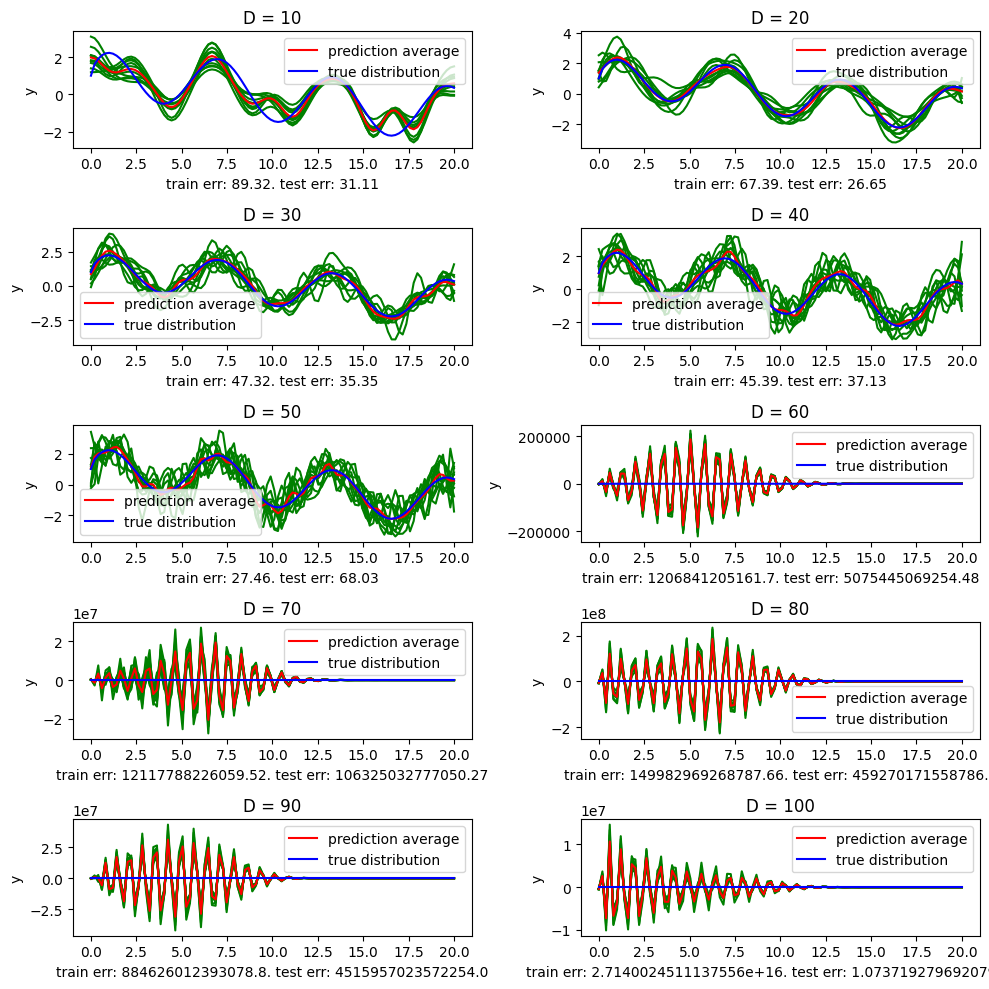

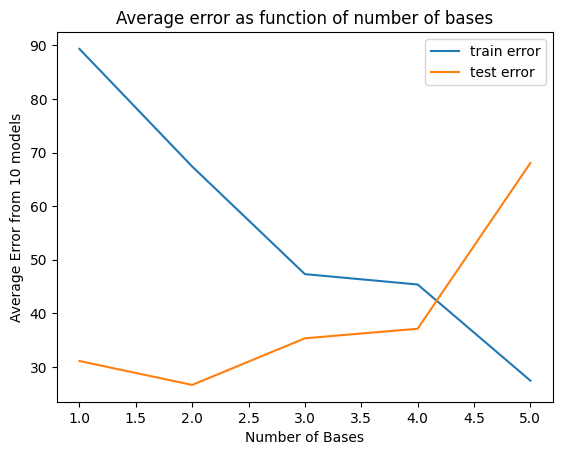

In [ ]:
# for 10 different number of bases create 10 models and plot
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

sset_total = []
ssev_total = []

for i, ax in enumerate(axs.flat):
  # define number of bases
  D = (i+1) * 10
  # create var for the avg prediction
  yh_avg = np.zeros(100)
  # define uniform x
  x = np.linspace(0, 20, 100)

  sset = []
  ssev = []

  # fit 10 different models
  for i in range(10):
    # generate the data points (100 of them)
    e = np.random.normal(0, 1, 100)
    y_noisy = f(x) + e
    # calc phi
    phi = calc_phi(x, D)
    model = LinearRegression()
    # train model
    model.fit(phi, y_noisy)
    # make predictions
    yh = model.predict(phi)
    # add prediction to avg
    yh_avg += yh
    # plot model
    ax.plot(x, yh, color='green')

    # now train model on train and test sets and calculate the error
    x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.2, random_state=39)
    phi_train = calc_phi(x_train, D)
    phi_val = calc_phi(x_val, D)
    model.fit(phi_train, y_train)
    yh_train = model.predict(phi_train)
    yh_val = model.predict(phi_val)
    sset.append(np.sum((y_train - yh_train)**2))
    ssev.append(np.sum((y_val - yh_val)**2))

  # calculate some averages
  sset_avg = np.mean(sset)
  ssev_avg = np.mean(ssev)

  sset_total.append(sset_avg)
  ssev_total.append(ssev_avg)

  yh_avg /= 10

  # plot the true distribution and average predictions
  ax.plot(x, yh_avg, label='prediction average', color='red')
  ax.plot(x, y_clean, label='true distribution', color='blue')
  ax.set_xlabel(f'train err: {round(sset_avg, 2)}. test err: {round(ssev_avg, 2)}')
  ax.set_ylabel('y')
  ax.set_title(f'D = {D}')
  ax.legend()

plt.tight_layout()
# display figure
plt.show()

# plot the average train/test error for 20 bases
plt.plot(np.arange(10, 60, 10), sset_total[:5], label='train error')
plt.plot(np.arange(10, 60, 10), ssev_total[:5], label='test error')
plt.title('Average error as function of number of bases')
plt.xlabel('Number of Bases')
plt.ylabel('Average Error from 10 models')
plt.legend()
plt.show()


##2.4 Explain

On smaller number of bases, you can see the lines of the 10 models follow eachother closly, thus varience is low. On the other hand since the models are simple, they don't fit the data very well, meaning they have high bias.

With a larger number of bases, you can see that the lines of the 10 models do not follow eachother, and are quite different. This means the varience is high. In addition, the average of the models predictions fit to the true distribution very well so there is lower bias.

Around 20 bases there is a good balence between the varience and the bias, as the models lines follow eachother descently well with not too much oscilation, and the average of the models predictions fit pretty well to the true distribution. This is in agreement with the plot of the average train and test error of the models. It can be seen in the plot above that the average test error is at its lowest around 20 bases.